In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pymysql
import getpass
%matplotlib inline

In [2]:
conn = pymysql.connect(host="localhost",
                       port=3306,
                       user="ironhack",
                       passwd=getpass.getpass(),
                       db="olist")

········


In [3]:
q = """
SELECT DISTINCT
    DATE_FORMAT(o.order_purchase_timestamp, '%Y-%m-01') AS month_id,
    oi.seller_id
FROM orders o
    JOIN order_items oi
    ON o.order_id = oi.order_id
ORDER BY 1,2;
"""

df = pd.read_sql(q, conn)

In [4]:
df.head()

,month_id,seller_id
0,2016-09-01,1554a68530182680ad5c8b042c3ab563
1,2016-09-01,a425f92c199eb576938df686728acd20
2,2016-09-01,ecccfa2bb93b34a3bf033cc5d1dcdc69
3,2016-10-01,011b0eaba87386a2ae96a7d32bb531d1
4,2016-10-01,01cf7e3d21494c41fb86034f2e714fa1


In [5]:
df.dtypes

month_id     object
seller_id    object
dtype: object

In [6]:
df["month_id"] = pd.to_datetime(df["month_id"])

In [7]:
# Filter timerange
df = df[df["month_id"].between("2017-01-01","2018-08-01",inclusive=True)]

In [8]:
df.head()

,month_id,seller_id
147,2017-01-01,004c9cd9d87a3c30c522c48c4fc07416
148,2017-01-01,014c0679dd340a0e338872e7ec85666a
149,2017-01-01,01cf7e3d21494c41fb86034f2e714fa1
150,2017-01-01,054694fa03fe82cec4b7551487331d74
151,2017-01-01,05ff92fedb5be47920fea08e501238b9


Make it comment

In [9]:
sample = df[df["seller_id"].eq("054694fa03fe82cec4b7551487331d74")]
sample

,month_id,seller_id
150,2017-01-01,054694fa03fe82cec4b7551487331d74
381,2017-02-01,054694fa03fe82cec4b7551487331d74
810,2017-03-01,054694fa03fe82cec4b7551487331d74
1310,2017-04-01,054694fa03fe82cec4b7551487331d74
1817,2017-05-01,054694fa03fe82cec4b7551487331d74
2397,2017-06-01,054694fa03fe82cec4b7551487331d74
4260,2017-09-01,054694fa03fe82cec4b7551487331d74
4992,2017-10-01,054694fa03fe82cec4b7551487331d74
7600,2018-01-01,054694fa03fe82cec4b7551487331d74
10517,2018-04-01,054694fa03fe82cec4b7551487331d74


In [10]:
sample = sample.assign(shifted_month_id=sample["month_id"].shift(1))
sample

,month_id,seller_id,shifted_month_id
150,2017-01-01,054694fa03fe82cec4b7551487331d74,NaT
381,2017-02-01,054694fa03fe82cec4b7551487331d74,2017-01-01
810,2017-03-01,054694fa03fe82cec4b7551487331d74,2017-02-01
1310,2017-04-01,054694fa03fe82cec4b7551487331d74,2017-03-01
1817,2017-05-01,054694fa03fe82cec4b7551487331d74,2017-04-01
2397,2017-06-01,054694fa03fe82cec4b7551487331d74,2017-05-01
4260,2017-09-01,054694fa03fe82cec4b7551487331d74,2017-06-01
4992,2017-10-01,054694fa03fe82cec4b7551487331d74,2017-09-01
7600,2018-01-01,054694fa03fe82cec4b7551487331d74,2017-10-01
10517,2018-04-01,054694fa03fe82cec4b7551487331d74,2018-01-01


In [11]:
# identify new
sample = sample.assign(growth_type=np.where(sample["shifted_month_id"].isna(),"new", np.nan))
sample

,month_id,seller_id,shifted_month_id,growth_type
150,2017-01-01,054694fa03fe82cec4b7551487331d74,NaT,new
381,2017-02-01,054694fa03fe82cec4b7551487331d74,2017-01-01,nan
810,2017-03-01,054694fa03fe82cec4b7551487331d74,2017-02-01,nan
1310,2017-04-01,054694fa03fe82cec4b7551487331d74,2017-03-01,nan
1817,2017-05-01,054694fa03fe82cec4b7551487331d74,2017-04-01,nan
2397,2017-06-01,054694fa03fe82cec4b7551487331d74,2017-05-01,nan
4260,2017-09-01,054694fa03fe82cec4b7551487331d74,2017-06-01,nan
4992,2017-10-01,054694fa03fe82cec4b7551487331d74,2017-09-01,nan
7600,2018-01-01,054694fa03fe82cec4b7551487331d74,2017-10-01,nan
10517,2018-04-01,054694fa03fe82cec4b7551487331d74,2018-01-01,nan


In [12]:
(sample["month_id"] - sample["shifted_month_id"])/np.timedelta64(1, "M")

150           NaN
381      1.018501
810      0.919937
1310     1.018501
1817     0.985647
2397     1.018501
4260     3.022649
4992     0.985647
7600     3.022649
10517    2.956940
dtype: float64

In [13]:
sample["month_id"].dt.month

150       1
381       2
810       3
1310      4
1817      5
2397      6
4260      9
4992     10
7600      1
10517     4
Name: month_id, dtype: int64

In [14]:
type(sample["month_id"])

pandas.core.series.Series

In [15]:
type(sample.month_id)

pandas.core.series.Series

Let's stop here.

In [16]:
sample

,month_id,seller_id,shifted_month_id,growth_type
150,2017-01-01,054694fa03fe82cec4b7551487331d74,NaT,new
381,2017-02-01,054694fa03fe82cec4b7551487331d74,2017-01-01,nan
810,2017-03-01,054694fa03fe82cec4b7551487331d74,2017-02-01,nan
1310,2017-04-01,054694fa03fe82cec4b7551487331d74,2017-03-01,nan
1817,2017-05-01,054694fa03fe82cec4b7551487331d74,2017-04-01,nan
2397,2017-06-01,054694fa03fe82cec4b7551487331d74,2017-05-01,nan
4260,2017-09-01,054694fa03fe82cec4b7551487331d74,2017-06-01,nan
4992,2017-10-01,054694fa03fe82cec4b7551487331d74,2017-09-01,nan
7600,2018-01-01,054694fa03fe82cec4b7551487331d74,2017-10-01,nan
10517,2018-04-01,054694fa03fe82cec4b7551487331d74,2018-01-01,nan


In [17]:
sample = sample.assign(previous_month=sample["month_id"] - pd.offsets.MonthEnd() - pd.offsets.MonthBegin())
sample

,month_id,seller_id,shifted_month_id,growth_type,previous_month
150,2017-01-01,054694fa03fe82cec4b7551487331d74,NaT,new,2016-12-01
381,2017-02-01,054694fa03fe82cec4b7551487331d74,2017-01-01,nan,2017-01-01
810,2017-03-01,054694fa03fe82cec4b7551487331d74,2017-02-01,nan,2017-02-01
1310,2017-04-01,054694fa03fe82cec4b7551487331d74,2017-03-01,nan,2017-03-01
1817,2017-05-01,054694fa03fe82cec4b7551487331d74,2017-04-01,nan,2017-04-01
2397,2017-06-01,054694fa03fe82cec4b7551487331d74,2017-05-01,nan,2017-05-01
4260,2017-09-01,054694fa03fe82cec4b7551487331d74,2017-06-01,nan,2017-08-01
4992,2017-10-01,054694fa03fe82cec4b7551487331d74,2017-09-01,nan,2017-09-01
7600,2018-01-01,054694fa03fe82cec4b7551487331d74,2017-10-01,nan,2017-12-01
10517,2018-04-01,054694fa03fe82cec4b7551487331d74,2018-01-01,nan,2018-03-01


In [18]:
sample.loc[sample["growth_type"].isna(),"growth_type"] = np.where(sample["shifted_month_id"].eq(sample["previous_month"]),"repeat","return")

End of comment

----

In [19]:
df.head()

,month_id,seller_id
147,2017-01-01,004c9cd9d87a3c30c522c48c4fc07416
148,2017-01-01,014c0679dd340a0e338872e7ec85666a
149,2017-01-01,01cf7e3d21494c41fb86034f2e714fa1
150,2017-01-01,054694fa03fe82cec4b7551487331d74
151,2017-01-01,05ff92fedb5be47920fea08e501238b9


In [20]:
df_shifted = df.assign(shifted_month=df["month_id"] + pd.DateOffset(months=1))
df_shifted.head()

,month_id,seller_id,shifted_month
147,2017-01-01,004c9cd9d87a3c30c522c48c4fc07416,2017-02-01
148,2017-01-01,014c0679dd340a0e338872e7ec85666a,2017-02-01
149,2017-01-01,01cf7e3d21494c41fb86034f2e714fa1,2017-02-01
150,2017-01-01,054694fa03fe82cec4b7551487331d74,2017-02-01
151,2017-01-01,05ff92fedb5be47920fea08e501238b9,2017-02-01


In [21]:
df_first = (df
            .groupby("seller_id")
            .min()
            .reset_index()
            .rename(columns={"month_id": "first_month"}))
df_first.head()

,seller_id,first_month
0,0015a82c2db000af6aaaf3ae2ecb0532,2017-09-01
1,001cca7ae9ae17fb1caed9dfb1094831,2017-02-01
2,001e6ad469a905060d959994f1b41e4f,2018-08-01
3,002100f778ceb8431b7a1020ff7ab48f,2017-09-01
4,003554e2dce176b5555353e4f3555ac8,2017-12-01


In [22]:
df = df.merge(df_first, how="left", on="seller_id")
df.head()

,month_id,seller_id,first_month
0,2017-01-01,004c9cd9d87a3c30c522c48c4fc07416,2017-01-01
1,2017-01-01,014c0679dd340a0e338872e7ec85666a,2017-01-01
2,2017-01-01,01cf7e3d21494c41fb86034f2e714fa1,2017-01-01
3,2017-01-01,054694fa03fe82cec4b7551487331d74,2017-01-01
4,2017-01-01,05ff92fedb5be47920fea08e501238b9,2017-01-01


In [23]:
df = df.merge(df_shifted,
              how="outer",
              left_on=["month_id", "seller_id"],
              right_on=["shifted_month", "seller_id"])
df

,month_id_x,seller_id,first_month,month_id_y,shifted_month
0,2017-01-01,004c9cd9d87a3c30c522c48c4fc07416,2017-01-01,NaT,NaT
1,2017-01-01,014c0679dd340a0e338872e7ec85666a,2017-01-01,NaT,NaT
2,2017-01-01,01cf7e3d21494c41fb86034f2e714fa1,2017-01-01,NaT,NaT
3,2017-01-01,054694fa03fe82cec4b7551487331d74,2017-01-01,NaT,NaT
4,2017-01-01,05ff92fedb5be47920fea08e501238b9,2017-01-01,NaT,NaT
...,...,...,...,...,...
21541,NaT,ff1fb4c404b2efe68b03350a8dc24122,NaT,2018-08-01,2018-09-01
21542,NaT,ffa6adafb71b807dc13159e26431354c,NaT,2018-08-01,2018-09-01
21543,NaT,ffc470761de7d0232558ba5e786e57b7,NaT,2018-08-01,2018-09-01
21544,NaT,ffdd9f82b9a447f6f8d4b91554cc7dd3,NaT,2018-08-01,2018-09-01


In [24]:
# remove the rows outside of daterange (after aug 2018)
df = df[~df["shifted_month"].eq(df["shifted_month"].max())].copy()

In [25]:
df.head()

,month_id_x,seller_id,first_month,month_id_y,shifted_month
0,2017-01-01,004c9cd9d87a3c30c522c48c4fc07416,2017-01-01,NaT,NaT
1,2017-01-01,014c0679dd340a0e338872e7ec85666a,2017-01-01,NaT,NaT
2,2017-01-01,01cf7e3d21494c41fb86034f2e714fa1,2017-01-01,NaT,NaT
3,2017-01-01,054694fa03fe82cec4b7551487331d74,2017-01-01,NaT,NaT
4,2017-01-01,05ff92fedb5be47920fea08e501238b9,2017-01-01,NaT,NaT


In [26]:
df.isna().sum()

month_id_x       3975
seller_id           0
first_month      3975
month_id_y       5253
shifted_month    5253
dtype: int64

In [27]:
# coalesce month_id
df = df.assign(month_id=df["month_id_x"].combine_first(df["shifted_month"]))
df.head()

,month_id_x,seller_id,first_month,month_id_y,shifted_month,month_id
0,2017-01-01,004c9cd9d87a3c30c522c48c4fc07416,2017-01-01,NaT,NaT,2017-01-01
1,2017-01-01,014c0679dd340a0e338872e7ec85666a,2017-01-01,NaT,NaT,2017-01-01
2,2017-01-01,01cf7e3d21494c41fb86034f2e714fa1,2017-01-01,NaT,NaT,2017-01-01
3,2017-01-01,054694fa03fe82cec4b7551487331d74,2017-01-01,NaT,NaT,2017-01-01
4,2017-01-01,05ff92fedb5be47920fea08e501238b9,2017-01-01,NaT,NaT,2017-01-01


In [31]:
df = (df
      .assign(inactive_1m=df["month_id_x"].isna().astype(int))
      .assign(new=df["month_id_x"].eq(df["first_month"]).astype(int))
      .assign(repeat=df["month_id_x"].eq(df["shifted_month"]).astype(int)))

In [35]:
df = df.assign(returning=1 - df[["inactive_1m", "new", "repeat"]].sum(axis=1))

show idxmax() method

In [41]:
df.loc[[134]][["inactive_1m", "new", "repeat", "returning"]]

,inactive_1m,new,repeat,returning
134,0,1,0,0


In [42]:
df.loc[[134]][["inactive_1m", "new", "repeat", "returning"]].idxmax(axis=1)

134    new
dtype: object

In [45]:
df.loc[[5923]][["inactive_1m", "new", "repeat", "returning"]]

,inactive_1m,new,repeat,returning
5923,0,0,0,1


In [46]:
df.loc[[5923]][["inactive_1m", "new", "repeat", "returning"]].idxmax(axis=1)

5923    returning
dtype: object

----

In [50]:
df = df.assign(growth_type=df[["inactive_1m", "new", "repeat", "returning"]].idxmax(axis=1))
df = df[["month_id", "seller_id", "growth_type"]].copy()

In [52]:
df.head()

,month_id,seller_id,growth_type
0,2017-01-01,004c9cd9d87a3c30c522c48c4fc07416,new
1,2017-01-01,014c0679dd340a0e338872e7ec85666a,new
2,2017-01-01,01cf7e3d21494c41fb86034f2e714fa1,new
3,2017-01-01,054694fa03fe82cec4b7551487331d74,new
4,2017-01-01,05ff92fedb5be47920fea08e501238b9,new


In [56]:
df_agg = df.groupby(["month_id", "growth_type"]).count().reset_index().rename(columns={"seller_id": "active_sellers"})

/Users/at/miniconda3/envs/code_red/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


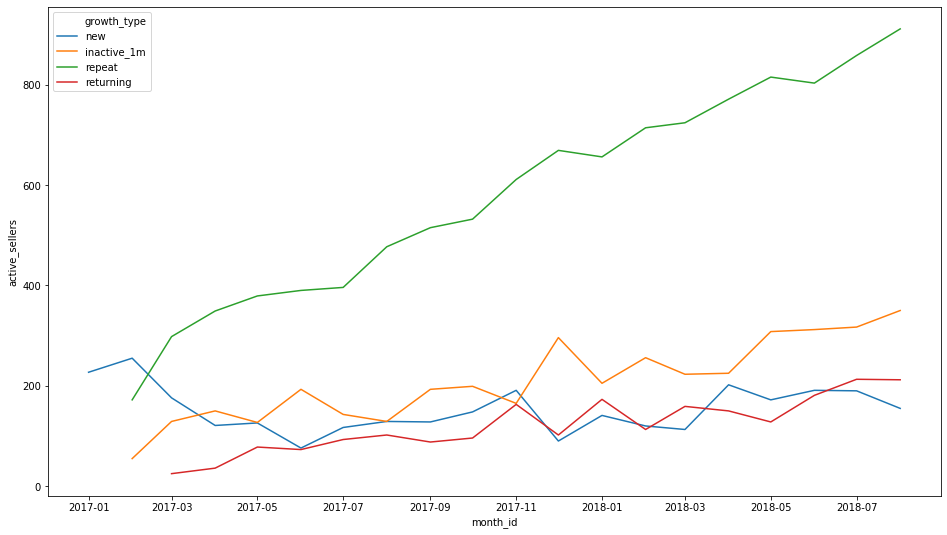

In [57]:
fig, ax = plt.subplots(figsize=(16,9))
sns.lineplot(data=df_agg,
             x="month_id",
             y="active_sellers",
             hue="growth_type",
             ax=ax);